In [1]:
import dill
import jupyter_contrib_nbextensions

In [2]:
dill.load_session('CreatePrimalGraphN1.db')
dill.load_session('CreateDualGraphN1.db')

In [3]:
dill.load_session('routing&vis.db')

In [2]:
#import all utilities imports
import matplotlib as mp, pandas as pd, numpy as np, geopandas as gpd
import functools
import math
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pysal as ps
import random
import pylab
import matplotlib.colors as cols
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, MultiLineString
from numpy.random import randn
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.patches as mpatches
import sys
from time import sleep
pd.set_option('precision', 10)
from mpl_toolkits.mplot3d.art3d import Line3DCollection

#import all street network fuctions imports
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import functools
import community
import math
from math import sqrt
import matplotlib.pyplot as plt
import ast

from scipy import sparse
from scipy.sparse import linalg
import pysal as ps

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.set_option('precision', 10)

#import computational notebook functions
import networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import community
import matplotlib.pyplot as plt
from importlib import reload
import geopandas as gpd
import functools
%matplotlib inline

pd.set_option('precision', 5)
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

import street_network_functions as snf
import utilities as uf

In [4]:
#initialise path, names, etc.

city_name = 'Valencia'
import_path ='dataComp/'+'Valencia'+'/'
saving_path ='dataComp/'+city_name+'/'
epsg = 4326
crs = {'init': 'epsg:4326', 'no_defs': True}

## 1. import graphs 

In [4]:
DualG

In [5]:
PrimalG

In [6]:
edgesP.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1,weightP2,weightP3
streetID,,,,,,,,,,,,,,,,,
6,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.0156,0.0156,NaN,1,10.8837695411,7.1714285714,10.8837695411,10.8837695411
7,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.0128,0.0128,NaN,1,3.6658482143,3.6658482143,3.6658482143,3.6658482143
8,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.0251,0.0251,Avinguda de Blasco Ibáñez,0,26.8842235504,14.6671875000,26.8842235504,29.5125835504
9,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.0129,0.0129,Carrer d'En Galceràn,0,15.0172324814,10.5158482143,15.0172324814,16.9016724814
10,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.0080,0.0080,NaN,0,12.0800330611,9.5459821429,12.0800330611,13.7906730611


In [7]:
nodesP.head()

,nodeID,x,y,geometry,elevation
2,2,-0.3545538,39.4760178,POINT (-0.35455 39.47602),9.304
3,3,-0.3938356,39.4589890,POINT (-0.39384 39.45899),18.489
4,4,-0.3433974,39.4810053,POINT (-0.34340 39.48101),6.834
6,6,-0.3546230,39.4758801,POINT (-0.35462 39.47588),9.094
8,8,-0.3726589,39.4625389,POINT (-0.37266 39.46254),12.923


In [8]:
edgesD.head()

,u,v,length,geometry,deg,rad,slopeCost,hasBikeP,length2,weightP1,weightP2,weightP3,key,angConf,weightA1,weightA2,weightA3,weightA4
0,31589,31590,84.8185,"LINESTRING (-0.39249 39.46118, -0.39272 39.46061)",103.7835826703,1.8113652271,9.9962053571,0.0,44.783,9.9962053571,9.9962053571,11.7875253571,0,6.1912759121,6.1912759121,16.1874812692,16.1874812692,17.9788012692
1,31584,31585,106.3580,"LINESTRING (-0.40323 39.45509, -0.40357 39.45448)",102.9404571375,1.7966499106,22.8024150431,0.0,98.874,22.0700892857,22.8024150431,26.7573750431,0,6.1196917459,6.1196917459,28.1897810316,28.9221067890,32.8770667890
2,31578,31579,27.8685,"LINESTRING (-0.36351 39.47819, -0.36326 39.47816)",96.0379556419,1.6761785328,10.4705977933,0.0,45.112,10.0696428571,10.4705977933,12.2750777933,0,5.5259363111,5.5259363111,15.5955791683,15.9965341045,17.8010141045
3,31566,31567,114.5960,"LINESTRING (-0.39236 39.45517, -0.39354 39.45565)",0.8123942953,0.0141789553,16.0964477385,0.0,56.985,12.7198660714,16.0964477385,18.3758477385,0,0.0000000000,0.0000000000,12.7198660714,16.0964477385,18.3758477385
4,31563,31567,61.5240,"LINESTRING (-0.39306 39.45580, -0.39354 39.45565)",76.2353152661,1.3305572577,16.0964477385,0.0,56.985,12.7198660714,16.0964477385,18.3758477385,0,3.8103258173,3.8103258173,16.5301918888,19.9067735558,22.1861735558


In [9]:
nodesD.head()

,streetID,length,grade,grade_abs,name,slopeCost,hasBikeP,weightP1,weightP2,weightP3,geometry,x,y
6,6,32.128,0.0156,0.0156,NaN,10.8837695411,1,7.1714285714,10.8837695411,10.8837695411,POINT (-0.35449 39.47615),-0.3544861500,39.4761525000
7,7,16.423,-0.0128,0.0128,NaN,3.6658482143,1,3.6658482143,3.6658482143,3.6658482143,POINT (-0.35459 39.47595),-0.3545884000,39.4759489500
8,8,65.709,0.0251,0.0251,Avinguda de Blasco Ibáñez,26.8842235504,0,14.6671875000,26.8842235504,29.5125835504,POINT (-0.35490 39.47613),-0.3549042014,39.4761334166
9,9,47.111,0.0129,0.0129,Carrer d'En Galceràn,15.0172324814,0,10.5158482143,15.0172324814,16.9016724814,POINT (-0.39401 39.45915),-0.3940097475,39.4591527027
10,10,42.766,0.0080,0.0080,NaN,12.0800330611,0,9.5459821429,12.0800330611,13.7906730611,POINT (-0.39361 39.45891),-0.3936059081,39.4589146249


## 1. find origin & destination

In [12]:
#Route 1
#Oceanogràfic of Valencia : 39.45305, -0.3471
#Porta de la Mar: 39.4721, -0.3685
originC1 = (39.45305, -0.3471)
desC1 = (39.4721, -0.3685)

In [66]:
#Route 2
#Plaza Redona:39.47359, -0.3766
#Bioparc Valencia:39.47813, -0.41115
originC2 = (39.47359, -0.3766)
desC2 = (39.47813, -0.41115)

In [67]:
#Route 3
#Plaza Redona:39.47359, -0.3766
#Hospital Universitari Doctor Peset:39.453, -0.3945
originC3 = (39.47359, -0.3766)
desC3 = (39.453, -0.3945)

## 2. route in graph
### 2.1 route in primal graph

In [15]:
originPN1 = ox.get_nearest_node(GPrimal, originC1)
desPN1 = ox.get_nearest_node(GPrimal, desC1)
originPN1, desPN1

(4096, 5175)

In [22]:
#function to map routes back to primal edge
def map_Rto_primalE(rlist,edges):
    #1 from route list create a list with u&v
    edge_nodes = list(zip(rlist[:-1], rlist[1:]))
    r_stID = []

    #2 create for loop which loops the whole edge_nodes
    elen = len(edge_nodes)
    for i in range(0,elen-1):
        row = edges.loc[((edges['u'] == edge_nodes[i][0]) | (edges['v'] == edge_nodes[i][0])) & ((edges['u'] == edge_nodes[i][1]) | (edges['v'] == edge_nodes[i][1]))]
        strID = row.iloc[0]['streetID']
        r_stID.append(strID)
    return r_stID

In [23]:
# function to create route & gdf that contains edges
#prerequisite: edges has to be mapped with streetID
def map_route(G,edges, nodes, origin,des,weight):
    route_nodes = nx.shortest_path(G, origin, des, weight)
    streetIDList = map_Rto_primalE(route_nodes, edges)
    route_edges = edges.loc[streetIDList]
    
    #calculate stats
    cycleLen = round((np.sum(route_edges['length'])),2)
    cycleTime = round((np.sum(route_edges[weight]))/60,2)
    elevation_gained = round(nodes['elevation'][des]-nodes['elevation'][origin],2)
    print('Time to cycle through {}m with {} is {}min. Elevation gained {}m.'.format(cycleLen, weight, cycleTime, elevation_gained))
    return route_edges
    

In [23]:
def plot_routes(routeN, routeC, route_list, base, title):
    fig, axs = plt.subplots(1,routeN,figsize=(routeN*5, 5))
    fig.suptitle(title, fontdict={'fontsize': '15', 'fontweight' : '3'})
    axs = axs.ravel()

    for i in range(routeN):
        edgesGdf = route_list[i]
        axs[i].axis('off')
        axs[i].set_title('Route '+str(i+1), fontdict={'fontsize': '12', 'fontweight' : '3'})
        southm, northm, westm, eastm = route_bbox(edgesGdf) 
        axs[i].set_ylim((southm, northm))
        axs[i].set_xlim((westm, eastm))

        base.plot(ax=axs[i], color='grey',linewidth=0.5)
        edgesGdf.plot(ax=axs[i], color = routeC ,linewidth=2)
    
    return fig

In [27]:
def route_bbox(edges):
    margin = 0.05
    west, south, east, north = edges.total_bounds
    margin_ns = (north - south) * margin
    margin_ew = (east - west) * margin
    southm = south - margin_ns
    northm = north + margin_ns
    westm = west - margin_ew
    eastm = east + margin_ew
    return southm, northm, westm, eastm  

In [20]:
routePR1w1 = map_route(GPrimal,edgesP, nodesP, originPN1, desPN1,'weightP1')

Time to cycle through 2825.32m with weightP1 is 10.51min. Elevation gained 8.3m.


In [21]:
routePR1w2 = map_route(GPrimal,edgesP, nodesP, originPN1, desPN1,'weightP2')

Time to cycle through 2825.97m with weightP2 is 11.17min. Elevation gained 8.3m.


In [22]:
routePR1w3 = map_route(GPrimal,edgesP, nodesP, originPN1, desPN1,'weightP3')

Time to cycle through 2825.97m with weightP3 is 11.41min. Elevation gained 8.3m.


In [25]:
PR1_array = [routePR1w1,routePR1w2,routePR1w3]

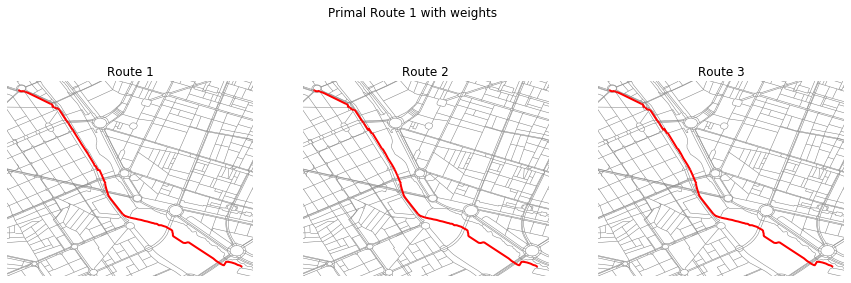

In [30]:
routesPR1 = plot_routes(routeN=3, routeC='red', route_list=PR1_array, base=edgesP,title='Primal Route 1 with weights')
routesPR1

# 2.2 route1 in dual graph

In [32]:
#find dual nodes
originDN1 = ox.get_nearest_node(DualG, originC1)
desDN1 = ox.get_nearest_node(DualG, desC1)
originDN1, desDN1

(6898, 12013)

In [53]:
#method 2, mapping from streetID
originDN1t = routePR1w1.streetID.iloc[0]
desDN1t = routePR1w1.streetID.iloc[-1]
originDN1t, desDN1t

(8990, 25168)

In [100]:
def map_dual_route(G,edgesD, edgesP, nodesP, origin,des,weight):
    route_nodes = nx.shortest_path(G, origin, des, weight)
    edgesDR = map_Rto_dualE(route_nodes,edgesD)
    edgesPR = edgesP.loc[route_nodes]
    
    #calculate stats
    cycleLen = round((np.sum(edgesPR['length'])),2)
    #cycleTime = round((np.sum(edgesDR[weight]))/60,2)
    cycleTime = round((np.sum(edgesDR['weightA2']))/60,2) if weight == 'weightA1' else round((np.sum(edgesDR[weight]))/60,2)
    #elevation_gained = round(nodesP['elevation'][des]-nodesP['elevation'][origin],2)
    angular_change = round((np.sum(edgesDR['angConf'])),2)
    print('Time to cycle through {}m with {} is {}min. Time confused by angular change is {}s.'.format(cycleLen, weight, cycleTime, angular_change))
    return edgesDR, edgesPR

In [35]:
def map_Rto_dualE(rlist,edges):
    #1 from route list create a list with u&v
    edge_nodes = list(zip(rlist[:-1], rlist[1:]))
    edgesDR = edges.loc[((edges['u'] == edge_nodes[0][0]) | (edges['v'] == edge_nodes[0][0])) & ((edges['u'] == edge_nodes[0][1]) | (edges['v'] == edge_nodes[0][1]))]

    #2 create for loop which loops the whole edge_nodes
    elen = len(edge_nodes)
    for i in range(1,elen-1):
        row = edges.loc[((edges['u'] == edge_nodes[i][0]) | (edges['v'] == edge_nodes[i][0])) & ((edges['u'] == edge_nodes[i][1]) | (edges['v'] == edge_nodes[i][1]))]
        edgesDR = edgesDR.append(row)
    return edgesDR

In [101]:
edgesDR1w1, routeDR1w1=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA1')

Time to cycle through 6832.13m with weightA1 is 25.16min. Time confused by angular change is 11.28s.


In [39]:
edgesDR1w2, routeDR1w2=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA2')

Time to cycle through 3926.68m with weightA2 is 6.56min. Elevation gained -2.59m, Time confused by angular change is 61.93s.


In [40]:
edgesDR1w3, routeDR1w3=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA3')

Time to cycle through 3922.32m with weightA3 is 7.67min. Elevation gained -2.59m, Time confused by angular change is 65.7s.


In [41]:
edgesDR1w4, routeDR1w4=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA4')

Time to cycle through 3904.81m with weightA4 is 8.62min. Elevation gained -2.59m, Time confused by angular change is 69.55s.


In [42]:
DR1_array = [edgesDR1w1,edgesDR1w2,edgesDR1w3,edgesDR1w4]

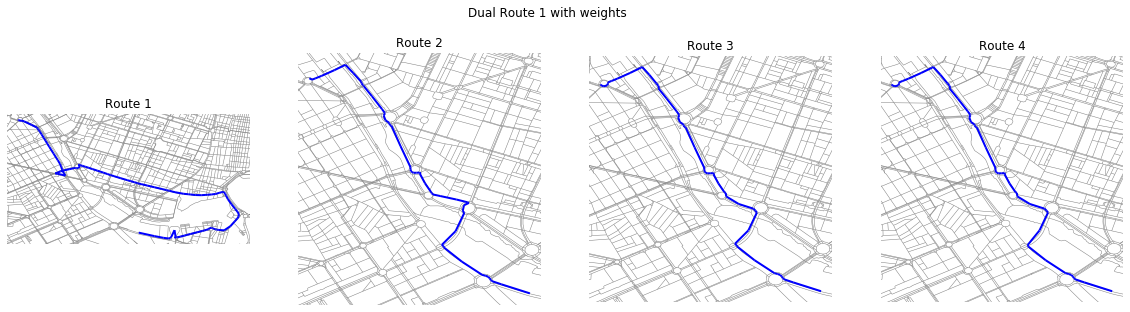

In [44]:
routesDR1 = plot_routes(routeN=4, routeC='blue', route_list=DR1_array, base=edgesP,title='Dual Route 1 with weights')
routesDR1

### Since using osmnx to find dual node gives a different one, now for routing dual graph, use the street id mapped from route 1 

In [102]:
edgesDR1w1t, routeDR1w1=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN1t, desDN1t, 'weightA1')

Time to cycle through 3580.3m with weightA1 is 9.88min. Time confused by angular change is 6.07s.


In [60]:
edgesDR1w2t, routeDR1w2=map_dual_route(DualG,edgesD, edgesP, nodesP,   originDN1t, desDN1t, 'weightA2')

Time to cycle through 3648.76m with weightA2 is 5.26min. Time confused by angular change is 60.76s.


In [61]:
edgesDR1w3t, routeDR1w3=map_dual_route(DualG,edgesD, edgesP, nodesP,   originDN1t, desDN1t, 'weightA3')

Time to cycle through 3663.7m with weightA3 is 5.8min. Time confused by angular change is 56.87s.


In [62]:
edgesDR1w4t, routeDR1w4=map_dual_route(DualG,edgesD, edgesP, nodesP,   originDN1t, desDN1t, 'weightA4')

Time to cycle through 3663.7m with weightA4 is 6.42min. Time confused by angular change is 56.87s.


In [103]:
DR1_array2 = [edgesDR1w1t,edgesDR1w2t,edgesDR1w3t,edgesDR1w4t]

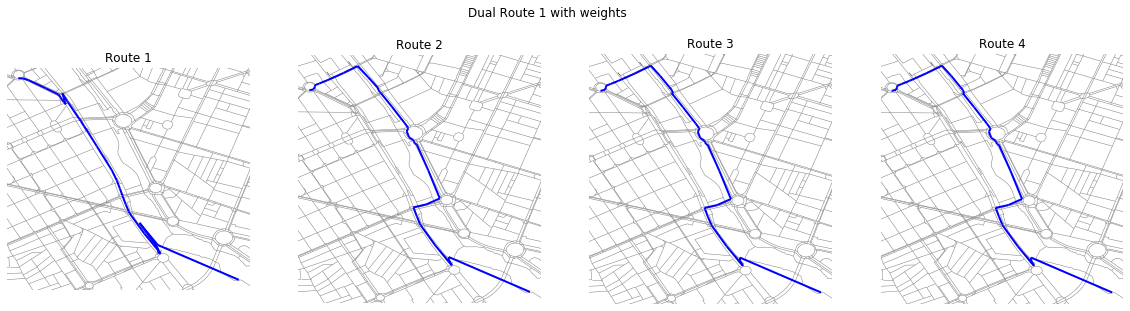

In [104]:
routesDR1t = plot_routes(routeN=4, routeC='blue', route_list=DR1_array2, base=edgesP,title='Dual Route 1 with weights')
routesDR1t

## 3.1 Route 2 Primal graph 

In [68]:
originPN2 = ox.get_nearest_node(GPrimal, originC2)
desPN2 = ox.get_nearest_node(GPrimal, desC2)
originPN2, desPN2

(10169, 11958)

In [69]:
routePR2w1 = map_route(GPrimal,edgesP, nodesP, originPN2, desPN2,'weightP1')

Time to cycle through 3529.52m with weightP1 is 13.13min. Elevation gained 11.01m.


In [70]:
routePR2w2 = map_route(GPrimal,edgesP, nodesP, originPN2, desPN2,'weightP2')

Time to cycle through 3585.04m with weightP2 is 14.01min. Elevation gained 11.01m.


In [71]:
routePR2w3 = map_route(GPrimal,edgesP, nodesP, originPN2, desPN2,'weightP3')

Time to cycle through 3677.19m with weightP3 is 16.03min. Elevation gained 11.01m.


In [77]:
PR2_array = [routePR2w1,routePR2w2,routePR2w3]

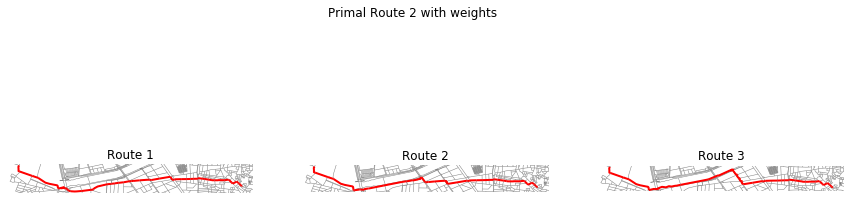

In [78]:
routesPR2 = plot_routes(routeN=3, routeC='red', route_list=PR2_array, base=edgesP,title='Primal Route 2 with weights')
routesPR2

## 3.2 Route 2 Dual graph 

In [72]:
# mapping from streetID
originDN2 = routePR2w1.streetID.iloc[0]
desDN2 = routePR2w1.streetID.iloc[-1]
originDN2, desDN2

(22610, 8072)

In [105]:
edgesDR2w1, routeDR2w1=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA1')

Time to cycle through 5663.73m with weightA1 is 15.71min. Time confused by angular change is 15.22s.


In [74]:
edgesDR2w2, routeDR2w2=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA2')

Time to cycle through 4007.87m with weightA2 is 8.81min. Time confused by angular change is 72.14s.


In [75]:
edgesDR2w3, routeDR2w3=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA3')

Time to cycle through 4031.89m with weightA3 is 9.2min. Time confused by angular change is 77.52s.


In [76]:
edgesDR2w4, routeDR2w4=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA4')

Time to cycle through 4031.89m with weightA4 is 10.56min. Time confused by angular change is 77.52s.


In [79]:
DR2_array = [edgesDR2w1,edgesDR2w2, edgesDR2w3,edgesDR2w4]

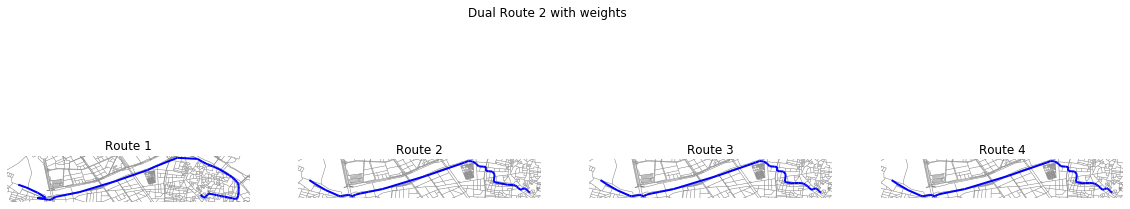

In [81]:
routesDR2 = plot_routes(routeN=4, routeC='blue', route_list=DR2_array, base=edgesP,title='Dual Route 2 with weights')
routesDR2

## 4.1 Route 3 Primal graph 

In [82]:
originPN3 = ox.get_nearest_node(GPrimal, originC3)
desPN3 = ox.get_nearest_node(GPrimal, desC3)
originPN3, desPN3

(10169, 14252)

In [83]:
routePR3w1 = map_route(GPrimal,edgesP, nodesP, originPN3, desPN3,'weightP1')

Time to cycle through 2848.9m with weightP1 is 10.6min. Elevation gained 0.66m.


In [84]:
routePR3w2 = map_route(GPrimal,edgesP, nodesP, originPN3, desPN3,'weightP2')

Time to cycle through 2982.66m with weightP2 is 12.4min. Elevation gained 0.66m.


In [85]:
routePR3w3 = map_route(GPrimal,edgesP, nodesP, originPN3, desPN3,'weightP3')

Time to cycle through 3045.93m with weightP3 is 14.23min. Elevation gained 0.66m.


In [90]:
PR3_array = [routePR3w1,routePR3w2,routePR3w3]

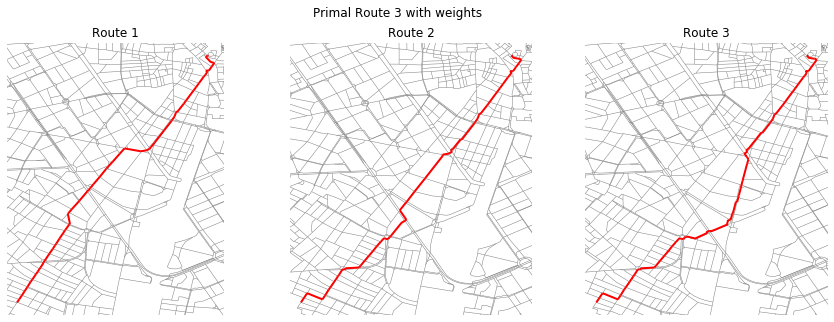

In [91]:
routesPR3 = plot_routes(routeN=3, routeC='red', route_list=PR3_array, base=edgesP,title='Primal Route 3 with weights')
routesPR3

## 4.1 Route 3 Dual graph 

In [92]:
# mapping from streetID
originDN3 = routePR3w1.streetID.iloc[0]
desDN3 = routePR3w1.streetID.iloc[-1]
originDN3, desDN3

(22610, 9879)

In [106]:
edgesDR3w1, routeDR3w1=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA1')

Time to cycle through 3236.54m with weightA1 is 11.22min. Time confused by angular change is 16.49s.


In [94]:
edgesDR3w2, routeDR3w2=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA2')

Time to cycle through 2937.28m with weightA2 is 9.34min. Time confused by angular change is 31.32s.


In [95]:
edgesDR3w3, routeDR3w3=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA3')

Time to cycle through 3606.31m with weightA3 is 10.34min. Time confused by angular change is 82.52s.


In [96]:
edgesDR3w4, routeDR3w4=map_dual_route(DualG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA4')

Time to cycle through 3580.66m with weightA4 is 11.75min. Time confused by angular change is 120.49s.


In [97]:
DR3_array = [edgesDR3w1, edgesDR3w2, edgesDR3w3, edgesDR3w4]

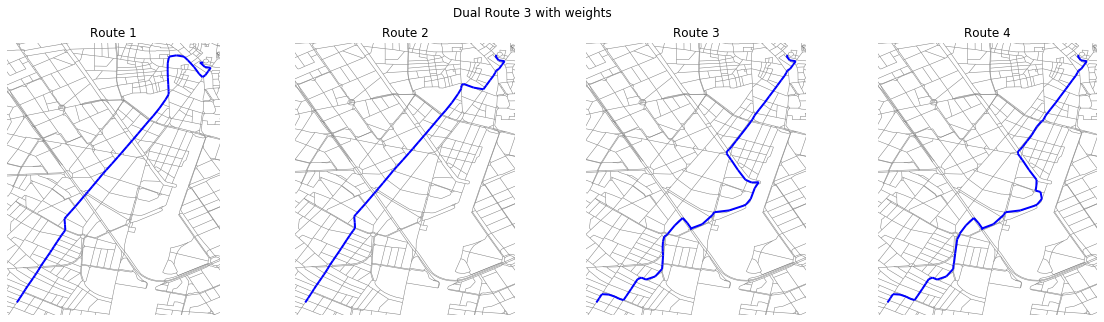

In [98]:
routesDR3 = plot_routes(routeN=4, routeC='blue', route_list=DR3_array, base=edgesP,title='Dual Route 3 with weights')
routesDR3

In [108]:
dill.dump_session('routing&vis.db')